# 1. Introduction

**Introduction**
In this project, Machine Learning algorithms are employed for the purpose of predicting price of diamond based on the gemstone quality and physical properties (such as dimension, color, clarity, etc.)


**Problem statement**


**Objectives**


**Current practice/ solution as it happens in the world market**


**What is offered in this solution?**



**Approach used in this work**

# 2. Importing Data and Introduction to Data exploration

## 2.1 Python Libraries and Dataset

### 2.1.1 Import Libraries

In [1]:
# Import necessary Python modules
import numpy as np                             # For handling mathematical and array-like operations
import pandas as pd                            # Necessary for data science
import matplotlib as mpl                       # For visualization of data as well as trained models
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

print("Library version:")
print(f"Numpy ver. {np.__version__}")
print(f"Matplotlib ver. {mpl.__version__}")
print(f"Seaborn ver. {sns.__version__}")
print(f"Pandas ver. {pd.__version__}")

Library version:
Numpy ver. 1.21.3
Matplotlib ver. 3.5.1
Seaborn ver. 0.11.2
Pandas ver. 1.4.2


In [2]:
# Create "Images" directory for storing images that will be created
os.makedirs(r"..\Images", exist_ok=True)

### 2.1.2 Load Dataset

In [3]:
DATA_DIR = "..\Dataset"
DATA = "diamonds.csv"

# Function to load data
def load_data(path=DATA_DIR, data=DATA):
    """Load DataFrame from a CSV file"""
    datapath = os.path.join(path, data)
    return pd.read_csv(datapath, index_col=0)

In [4]:
diamonds = load_data()

## 2.2. Introduction to Data Exploration

### 2.2.1 General Exploration of Data

In [5]:
rows, cols = diamonds.shape

print(f"Number of instances (rows): {rows}")
print(f"Number of attributes (including both explanatory and response variables): {cols}")

Number of instances (rows): 53940
Number of attributes (including both explanatory and response variables): 10


In [6]:
print("Five top rows of the dataset:")
diamonds.head(5)

Five top rows of the dataset:


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* Each row contains data for one diamond gemstone; physical properties for that diamond and its price in the market.
* There are 10 attributes in the dataset of which nine are features (carat, cut, color, clarity, depth, table, x, y, and z) and one label or target attribute (price).

**Description of attributes:**

The diamonds DataFrame contains the following columns:
* carat: 
* cut:
* color:
* clarity:
* depth:
* table:
* x:
* y:
* z:
* price:

In [7]:
# Modify indices so that they start at value 0
new_indices = np.arange(len(diamonds))

diamonds.set_index(new_indices, inplace=True)

In [8]:
# Rearrange columns so that the target attribute is the last column 
columns = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"]

diamonds = diamonds[columns].copy()

In [9]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


* The info() method provides a quick description of the dataset: total number of observations (53,940 observations), names as well as total number of columns or attributes, total number of non-null values in each column, data type of each column, and the amount of memory used to store the dataset (about 4.5 MB).
* The absence of missing values in the dataset helps to simplify the data cleaning step.

* The columns "*cut*", "*color*", and "*clarity*" contain categorical data (later on, pie charts will be plotted to show what categorical values exist in each categorical field/ column and their dominance), while the rest contain quantitative values. It is worth noting that the diamond prices are expressed as integer values rather than floating point numbers.

**Important key notes:**
* This is a **supervised machine learning** problem of the **regression** nature because the label for each diamond instance is provided. Specifically, this is a **univariate regression** problem because only one attribute (diamond price) will be predicted.
* Since the dataset is fairly small (with only 53,940 observations), uses only small amount of memory, and also no stream of data is expected to be fed continuously into the machine learning system, the machine learning pipeline will be focused on **batch learning**.

# 3. Exploratory Data Analysis and Data Cleaning

## Summary of statistics: Numeric values

In [10]:
# Descriptive statistics of the DataFrame for numeric data
print("Summary of the numerical attributes:")
diamonds.describe().T

Summary of the numerical attributes:


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00


**Description:**

The method describe() provides descriptive statistics of the dataset.
* The column "count" shows the total number of observations in each field; each field has a total of 53,940 observations.
* The "mean" column represents the average value in each respective field. Usually, the mean is not very stable and is highly affected by outliers.
* The "std" column (standard deviation) shows deviation of data from the mean value. Like the mean, outliers badly affect the standard deviation.
* The distribution of data are represented by the minimum and maximum values ("min" and "max" columns, respectively).
* Additionally, percentiles (25th, 50th, 75th) are used to describe distribution of data.
* It should be noted that the 50th percentile represents the median value. The median is more stable than the mean, but, highly susceptible to noise.
* Looking at the "**price**" row, diamond prices ranged from 326 to 18,823 USD. The median price was 2,401 USD, while the average price was approximately 3,932.80 USD with a standard deviation of 3,989.43 USD. Moreover, 75% of diamonds were priced below 5,324.25 USD, while the highest price was 18,823 USD.
* It can be easily observed that the minimum values for "**x**" (length), "**y**" (width), and "**z**" (depth) are zero (0). This could be due to errors during data recording. This case will be dealth with during data cleaning in the coming cells.

#### Getting insights into the zero values for dimensions of diamonds

In [11]:
zero_dim_values = diamonds[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["z"] == 0)]

zero_dim_values

,carat,cut,color,clarity,depth,table,x,y,z,price
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0,3142
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0,3837
10167,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,4731
11182,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0,5139
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,5564
15951,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
24394,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631


**Observations:**

As it can be observed in the previous cell, there are 7 cases where diamonds have zero values in all dimensions (i.e., length, width, and depth) and still have price values. If a machine learning model learns from these data records, it could then lead to poor generalization results upon deployment. In addition, since only 7 cases have been identified (which is negligible compared to the number of records in the diamonds DataFrame) and since gemstone dimensions is an important parameter for predicting gemstone price, the 7 records will not be dropped, instead all zero values in any dimension will be imputed by either the respective dimension mean or median.

The choice to whether use the mean or median as the imputation strategy depends on the amount and extent of outliers, since outliers tend to affect the mean but not the median.

In [12]:
# Detect outliers in the dataset
# Histogram and box plots
def plot_distributions(columns):
    """
    Visualize distributions of data using both histogram and Whisker plots
    Parameters
    ----------
    columns : str, list-like array of strings
              Columns of a dataframe containing numeric values.
    """
    nrows = len(columns)          # Number of rows for subplots
    ncols = 2                     # Number of columns for subplots
    color = {
        "boxes"    : "DarkGreen",
        "whiskers" : "DarkOrange",
        "medians"  : "Gray",
        "caps"     : "DarkBlue"
    }
    
    for i, col in enumerate(columns):
        figure = plt.figure(num="Distribution of data based on diamonds dimension measurements", figsize=(12,16))
        index = (i*2)
        # Histogram
        plt.subplot(nrows, ncols, index+1)
        diamonds[col].hist(bins=35)
        plt.title(f"Histogram plot for {col.capitalize()}", fontsize=13)
        plt.xlabel(f"{col.capitalize()} (mm)", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        
        # Whisker plot
        plt.subplot(nrows, ncols, index+2)
        diamonds[col].plot.box(vert=True, color=color)
        plt.title(f"Box-Whisker plot for {col.capitalize()}", fontsize=13)
        plt.xlabel("Dimension", fontsize=12)
        plt.ylabel("Values (mm)", fontsize=12)
        
    plt.tight_layout(pad=5)
    plt.show()
    figure.savefig(r"..\Images\Histogram and Box-Whisker plots for x, y, and z")

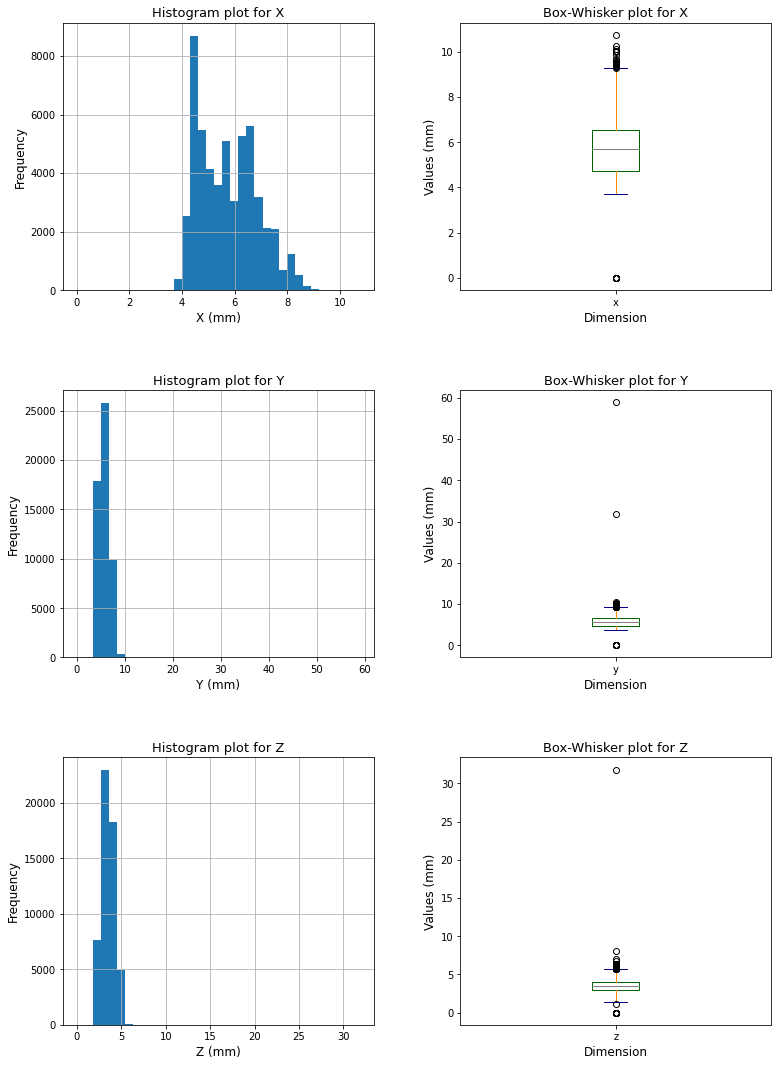

In [13]:
plot_distributions(["x", "y", "z"])

The Box-Whisker plots show the presence of outliers in each dimension (outliers are shown as the points located outside the whiskers of the box plot). Outliers have been determined automatically based on the famously known equation: Outlier = all points outside (Q1 - 1.5 * IQR) or (Q3 + 1.5 * IQR); where:
* Q1: First quartile (or 25th percentile)
* Q3: Third quartile (or 75th percentile)
* IQR: Interquartile range (IQR = Q3 - Q1)

Based on these observations, the median for each dimension will be used to impute zero values in each dimension (i.e, x (length), y (width), and z (dimension).

In [14]:
# Replace zerominimum values in diamonds dimensions
dims = ["x", "y", "z"]

for dim in dims:
    value = diamonds[dim].median()
    diamonds[dim].replace(to_replace=0, value=value, inplace=True)

In [15]:
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.20,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.00,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.00,56.00,57.00,59.00,95.00
x,53940.0,5.732003,1.119587,3.73,4.71,5.70,6.54,10.74
y,53940.0,5.735267,1.140265,3.68,4.72,5.71,6.54,58.90
z,53940.0,3.540043,0.702400,1.07,2.91,3.53,4.04,31.80
price,53940.0,3932.799722,3989.439738,326.00,950.00,2401.00,5324.25,18823.00


Now, the minimum values of zero that once appeared in each dimension (i.e., x (length), y (width), and z (depth)) have been fixed.

#### Data distribution: Numeric attributes

<Figure size 1200x800 with 0 Axes>

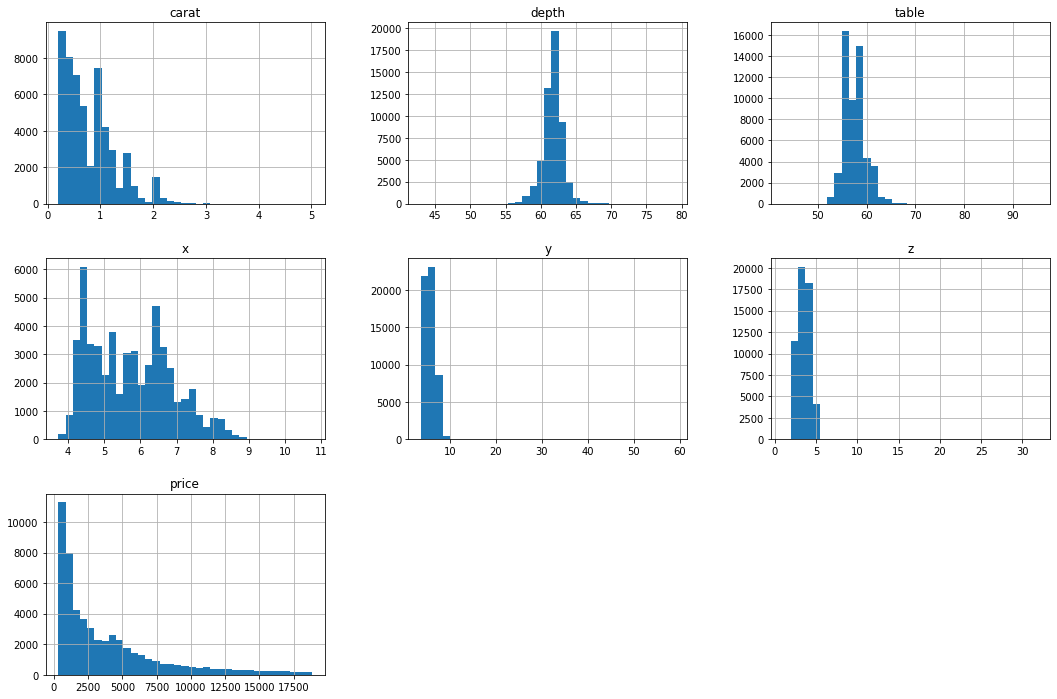

In [16]:
plt.figure(dpi=200)
hist_plots = diamonds.hist(bins=35, figsize=(18,12))     # Plot histogram for each numeric variable
plt.savefig(r"..\Images\Histogram plots for numeric variables", dpi=80)

**Observations:**
* The diamonds depths appear to be normally distributed; most diamonds have a depth of about 62.5%.
* The distributions of data based on "**carat**", "**x**" (length), and "**price**" are skewed positively, implying that mass of the data is clustered on the left-tail of the distribution, while the right-tail of distribution is longer.
* Most of the diamonds had a relatively low price, although there were some few exceptions with prices beyong 17,500 USD. Recalling the summary of statistics, 75% of diamonds were priced below 5,324.25 USD.
* The distributions of diamond width and depth (i.e., "**y**" and "**z**" respectively) clearly show presence of outliers on the far further positive values. Outliers can be easily identified using the Box and Whisker plot as shown before in previous cells.

#### Spotting outliers

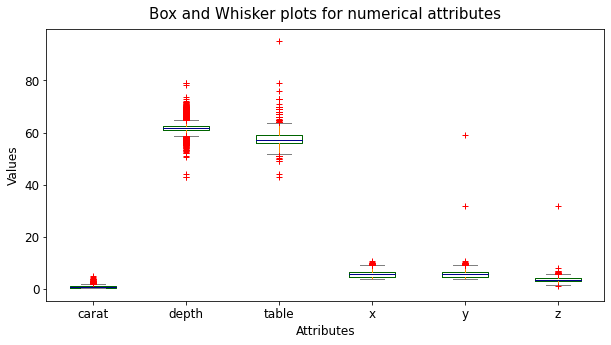

In [17]:
# Box and Whisker plots
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray"
}

attributes = ["carat", "depth", "table", "x", "y", "z"]

diamonds[attributes].plot.box(figsize=(10,5), color=color, sym="r+", fontsize=12)
plt.title("Box and Whisker plots", fontsize=15, pad=10)
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.show()

The Box and Whisker plots for the numerical attributes show that there is significant number of outliers for each attribute.

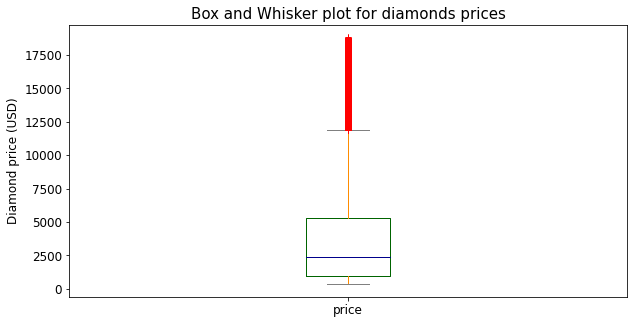

In [18]:
# Box and Whisker plot for diamonds prices

diamonds["price"].plot.box(figsize=(10,5), color=color, sym="r+", fontsize=12)
plt.title("Box and Whisker plot for diamonds prices", fontsize=15)
plt.ylabel("Diamond price (USD)", fontsize=12)
plt.show()

**Observations:**

In the two previous cells;
* The shape of box plot for each attribute indicates that there is a narrow distribution of data. However, there is a moderate exception when it comes to the "**price**" attribute. 
* The Box and Whisker plots show that outliers are present in each attribute. Outliers can be identified as red-cross points on the Box-Whisker plots. Since most machine learning models tend to be affected significantly by outliers, these outliers will be dealt with in the coming cells.

## Summary of statistics: Nominal variables

In [19]:
print("Summary of the categorical attributes:")
diamonds.describe(include="O").T

Summary of the categorical attributes:


,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


* Decriptive statistics for categorical variables (i.e., **cut**, **color**, and **clarity**) shows that each variable has 53,940 observations.
* The **cut**, **color**, and **clarity** columns have 5, 7 and 8 unique nominal values, respectively.
* The value "*Ideal*" is the most common in the column **cut** and it has appeared 21,551 times. Moreover, values "*G*" (11,292 times) as well as "*SI1*" (13,065) appeared most frequently in the **color** and **clarity** columns, respectively.

#### Distribution of diamonds based on categorical values

In [20]:
def pie_plotter(columns, figsize=(20,20)):
    """
    Plots pie chart(s) showing percentage distribution of several categorical variables.
    
    Parameters
    ----------
    columns : str, list-like array of strings
              Columns of a DataFrame containing categorical values
    figsize : tuple of integers, optional, default (20,20)
              Size of the figure. For pie charts, it is recommended to have a square figure size (i.e, equal ints) for a perfect circle.
    """
    # Number of subplots arranged ina  row
    N = len(columns)
    
    for i, col in enumerate(columns):
        plt.subplot(1, N, i+1)
        cat = diamonds[col].value_counts().rename_axis("category").reset_index(name="counts")
        labels = cat["category"]
        cat["counts"].plot.pie(labels=labels, ylabel="", autopct="%1.2f%%", figsize=figsize)
        
        # Subplot titles
        if col=="cut":
            plt.title("Cut quality", fontsize=15, weight="semibold")
        else:
            plt.title(col.capitalize(), fontsize=15, weight="semibold")
    plt.show()

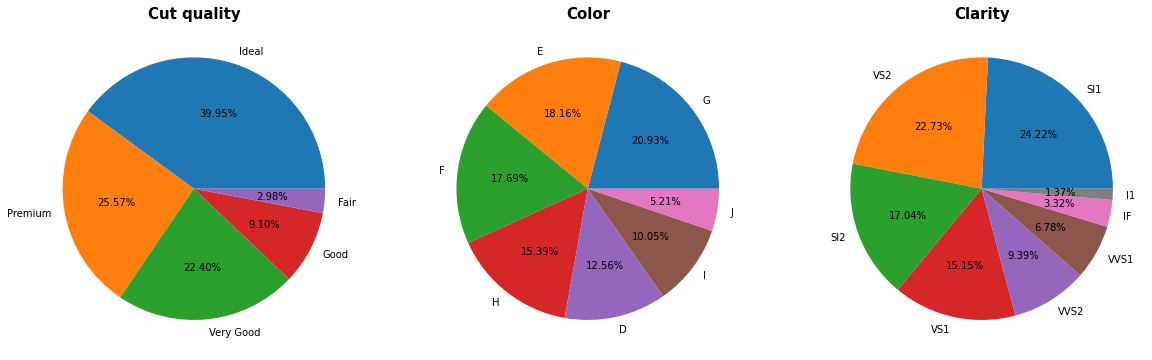

In [21]:
pie_plotter(columns=["cut", "color", "clarity"])

**Observations:**
* The pie chart for cut quality shows that about 87.92% of the diamonds had at least a very good cut quality. Moreover, most of the diamonds (39.95%) were considered to be cut perfectly, while only 2.98% of the diamonds were of fairly-low cut quality.
* Based on diamonds colors, the worst color (i.e., color J) comprised of about 5.21% of the diamonds, while about 12.56% of the diamonds were found to have the best color (i.e., color D) as shown in the color pie chart.
* The distribution of diamonds based on gemstone clarity as shown in the pie chart of clarity shows that only 1.37% of the diamonds were of the "I1" grade, meaning that they had significant amount of inclusions and blemishes that tend to affect diamond transparency as well as brilliance. Moreover, about 3.32% of the diamonds were found to have the best clarity grade (i.e., grade IF), implying that there are no visible inclusions and blemishes under 10X magnification.

### Duplicates and Outliers

It is always a good practice to detect and remove outliers from a dataset prior to model fitting. Having outliers in the dataset is not good since outliers tend to introduce errors to a trained model, leading the model to produce erroneous results during generalizations. Some of the effects of outliers are described:
* Outliers tend to strongly affect the mean as well a standard deviation of the data,
* Outliers increases the error variance and also reduces the power of statistical tests,
* Non-randomly distributed outliers tend to decrease normality of the data,
* Most machine learning algorithms do not perform well in the presence of outliers,
* Outliers can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

#### Check and remove duplicate records

Presence of actual/ true duplicate data points in both train and test datasets may inflate the metrics of the model. However, it is acceptable to leave (i.e., never drop) duplicate records from a dataset given that it is not clear that the identified duplicates are true or not.

On calling the pandas dataframe method with default values, the output reveals 146 duplicate records; the results are contradicting to conclude that the returned duplicates are true duplicates.
Therefore, the keyword "*keep*" is set to "*False*" so that both the first and last duplicate data points will be considered as duplicate data points, which in turn will help to reveal the sequence at which duplicates appear, consequently simplify decision making step.

In [22]:
dupl = diamonds.duplicated(keep=False)
dupl_total = dupl.sum()     # Returns total number of duplicate data points

print(f"There are {dupl_total} duplicate records.")

There are 289 duplicate records.


In [23]:
diamonds[dupl]

,carat,cut,color,clarity,depth,table,x,y,z,price
1004,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
1005,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
1006,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
1007,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
1008,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,Good,F,SI2,64.1,60.0,5.70,5.71,3.53,2130
50078,0.51,Ideal,F,VVS2,61.2,56.0,5.19,5.17,3.17,2203
50079,0.51,Ideal,F,VVS2,61.2,56.0,5.19,5.17,3.17,2203
52860,0.50,Fair,E,VS2,79.0,73.0,5.21,5.18,4.09,2579


The non-random sequence of appearance of duplicate data points (as indicated by their indices) suggests that these are actual duplicate records. Therefore, the identified duplicate records will be removed in the next cell. The duplicate records will be saved in a CSV file for further clarification.

In [24]:
# Save duplicates in a CSV files
diamonds[dupl].to_csv("duplicate records.csv", index_label="index")

In [25]:
diamonds.drop_duplicates(keep="first", inplace=True)

### Correlations

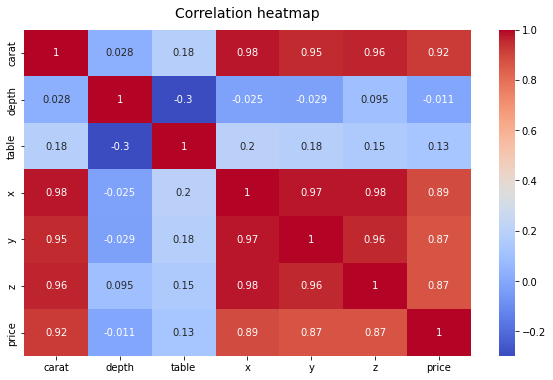

In [26]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(diamonds.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation heatmap", fontsize=14, pad=12)
plt.show()

**Observations:**
The correlation heatmap plot reveals that: -
* A strong positive correlation exists between diamond price and both its carat and size; the larger the diamond and/ or the higher its carat, the higher is its price. This is good since it implies that diamond price is a function of other variables.
* A strong positive correlation between features is observed: diamond size (i.e., length, width, and depth) and carat. This is due to the fact that carat is simply a unit of measurement for diamond weight. Therefore, bigger diamonds are most likely to have higher carats.
* The situation where multiple independent variables are strongly correlated (i.e., correlation >= 0.8) is known as multi-collinearity. Multicollinearity tends to violate assumption of Linear Regression analysis which requires that observations are independent of each other. In machine learning, multicollinearity is a serious problem and hence will be dealt with in the coming cells.
* Lastly, there is a moderate negative correlation between diamond table and depth measurements, which implies that increasing diamond depth leads to reducing its table measurement.

In the next two (2) cell, a scattergram is plotted in order to visualize linear correlations between all numeric variables. In the scattergram figure, the Kernel density plots are plotted along the diagonal (by setting *diagonal="kde"* as an argument of *scatter_matrix()* function) in order to show data distributions for each variable.

In [27]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

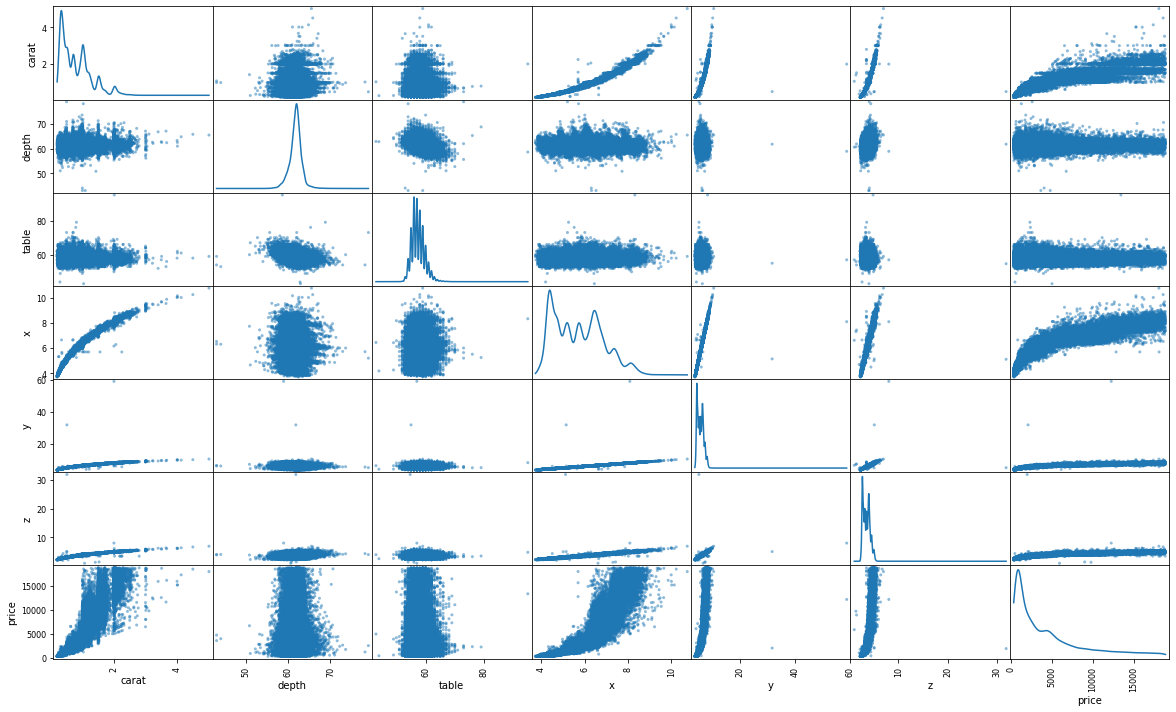

In [28]:
plt.figure(num="Correlation matrix plot")
scatter_matrix(diamonds, diagonal="kde", figsize=(20,12), grid=True)
plt.show()

The scattergams of independent variables (carat, x, y, and z) that strongly correlate with the target variable (diamond price) are plotted in order to gain insights for their relationships.

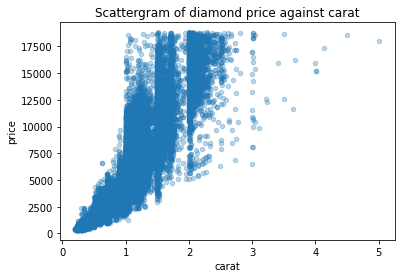

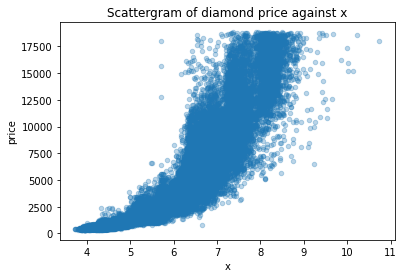

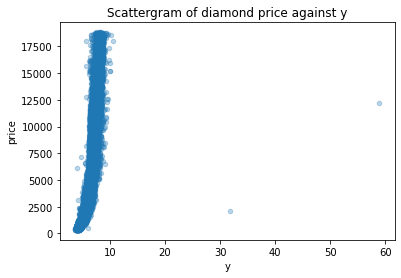

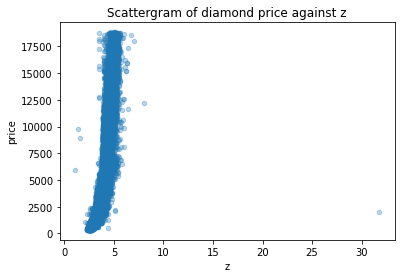

In [29]:
var_to_plot = ["carat", "x", "y", "z"]     # Variables to be plotted

for var in var_to_plot:
    diamonds.plot(kind="scatter", x=var, y="price", alpha=0.3)
    plt.title(f"Scattergram of diamond price against {var}")

In the scatter plot of price against carat shows several vertical lines at carat values 1, 1.5, 1.7, 2, 2.5, 3, and some other carat values less than 1. This could to errorneous results upon generalization of machine learning model if the model was to learn from these kinds of data. 

## Feature Engineering and Feature Selection

# 4. Data Modeling

# 5. Model Evaluation